In [17]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [18]:
!git clone https://github.com/ultralytics/yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [19]:
!cd yolov5 & pip install -r requirements.txt

In [20]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-23 Python-3.13.5 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [22]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [23]:
img = 'https://media.gettyimages.com/id/112301223/photo/boy-standing-on-hood-of-car.jpg?s=612x612&w=0&k=20&c=04qMLZ4MkgYmD8hq-tx9gUgCf2OrrDxOXYM-Dv9yGRc='

In [25]:
results = model(img)
results.print()

C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 612x408 1 person, 1 car
Speed: 2036.2ms pre-process, 107.1ms inference, 60.4ms NMS per image at shape (1, 3, 640, 448)


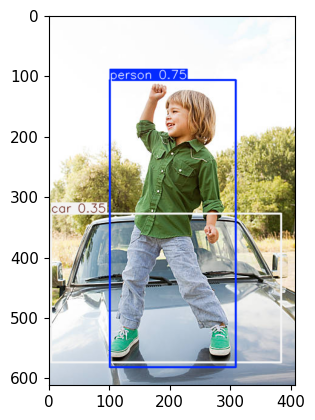

In [26]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [27]:
results.render()

[array([[[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [252, 252, 252]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [252, 252, 252]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [252, 252, 252],
         [252, 252, 252]],
 
        ...,
 
        [[193, 205, 219],
         [193, 205, 219],
         [194, 206, 220],
         ...,
         [115, 131, 156],
         [116, 132, 157],
         [117, 133, 158]],
 
        [[193, 205, 219],
         [193, 205, 219],
         [194, 206, 220],
         ...,
         [112, 128, 153],
         [112, 128, 153],
         [113, 129, 154]],
 
        [[192, 204, 218],
         [193, 205, 219],
         [193, 205, 219],
         ...,
         [114, 130, 155],
  

In [28]:
cap =cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()

    results=model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(0) & 0xFF==ord('q'):
     break

cap.release()
cv2.destroyAllWindows()

C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [29]:
import uuid   # Unique identifier
import os
import time

In [31]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [82]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


In [30]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

NameError: name 'IMAGES_PATH' is not defined

In [84]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data\images\awake.197a6717-4ce8-11f0-b481-04ecd84eb343.jpg
data\images\awake.197a69b9-4ce8-11f0-be47-04ecd84eb343.jpg
data\images\awake.197a6b78-4ce8-11f0-b495-04ecd84eb343.jpg
data\images\awake.197a6d1c-4ce8-11f0-a138-04ecd84eb343.jpg
data\images\awake.197a6f7e-4ce8-11f0-a0c3-04ecd84eb343.jpg
data\images\awake.197a726b-4ce8-11f0-bdc2-04ecd84eb343.jpg
data\images\awake.197a7408-4ce8-11f0-9088-04ecd84eb343.jpg
data\images\awake.197a758d-4ce8-11f0-b56b-04ecd84eb343.jpg
data\images\awake.197a771a-4ce8-11f0-96bf-04ecd84eb343.jpg
data\images\awake.197a78a5-4ce8-11f0-9839-04ecd84eb343.jpg
data\images\awake.197a7a17-4ce8-11f0-b263-04ecd84eb343.jpg
data\images\awake.197a7b74-4ce8-11f0-9a22-04ecd84eb343.jpg
data\images\awake.197a7ce0-4ce8-11f0-99d9-04ecd84eb343.jpg
data\images\awake.197a7e68-4ce8-11f0-89e9-04ecd84eb343.jpg
data\images\awake.197a7f92-4ce8-11f0-aef2-04ecd84eb343.jpg
data\images\awake.197a807b-4ce8-11f0-be5a-04ecd84eb343.jpg
data\images\awake.197a8193-4ce8-11f0-ab63-04ecd84eb343.j

In [32]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [33]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [30]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

C:\Users\91639\books-project\drowsiness\yolov5\utils\general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False,

In [31]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\91639/.cache\torch\hub\master.zip


YOLOv5  2025-6-23 Python-3.13.5 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [32]:
img = os.path.join('data', 'images', 'drowsy.76349815-4ce7-11f0-a908-04ecd84eb343.jpg')

In [33]:
results = model(img)

C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [34]:
results.render()


[array([[[153, 152, 132],
         [158, 157, 137],
         [158, 157, 137],
         ...,
         [197, 194, 189],
         [197, 193, 190],
         [197, 193, 190]],
 
        [[155, 154, 134],
         [157, 156, 136],
         [157, 156, 136],
         ...,
         [197, 194, 189],
         [197, 193, 190],
         [197, 193, 190]],
 
        [[158, 157, 139],
         [157, 156, 138],
         [158, 157, 139],
         ...,
         [197, 194, 189],
         [197, 194, 189],
         [197, 194, 189]],
 
        ...,
 
        [[139, 148, 145],
         [135, 144, 141],
         [131, 140, 137],
         ...,
         [239, 241, 230],
         [239, 241, 230],
         [239, 241, 228]],
 
        [[135, 144, 141],
         [132, 141, 138],
         [130, 139, 136],
         ...,
         [239, 241, 228],
         [238, 240, 227],
         [238, 240, 226]],
 
        [[133, 142, 139],
         [132, 141, 138],
         [131, 140, 137],
         ...,
         [238, 240, 227],
  

In [35]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 25.4ms pre-process, 35.6ms inference, 244.7ms NMS per image at shape (1, 3, 480, 640)


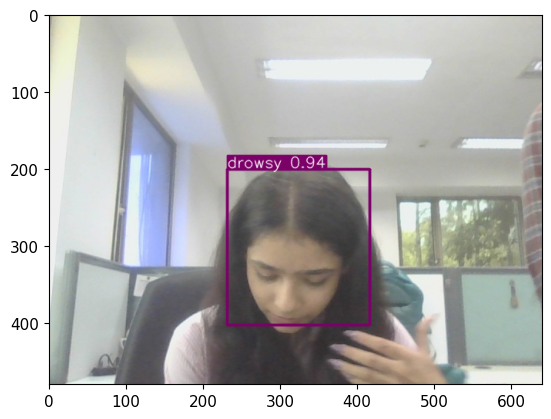

In [16]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [36]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\91639/.cache\torch\hub\ultralytics_yolov5_master\models